<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/hybrid_Ensemle3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np # numeric processing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split  
from IPython.display import HTML
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from functools import *
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


upload the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving chronic_kidney_disease.csv to chronic_kidney_disease.csv


In [8]:
# Load dataset
data = pd.read_csv('chronic_kidney_disease.csv')
# give the dtypes of the columns if the data was squeeky clean
dtypes = {
    'age' : np.int32,
    'bp' : np.float32,
    'sg' : object, # category
    'al' : object, # category # mistake
    'su' : object, # category  # mistake
    'rbc' : object, # category
    'pc' : object, # category
    'pcc' : object, # category
    'ba' : object, # category
    'bgr' : np.float32, 
    'bu' : np.int32,
    'sc' : np.float32,
    'sod': np.int32,
    'pot' : np.float32,
    'hemo' : np.float32,
    'pcv' : np.int32,
    'wc' : np.int32,
    'rc' : np.int32,
    'htn' : object,
    'dm' : object,
    'cad' : object,
    'appet': object,
    'pe' : object,
    'ane' : object,
    'class': object}


In [9]:
# see the first couple of observations and transpose 10 observations
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
age,48,7,62,48,51,60,68,24,52,53
bp,80,50,80,70,80,90,70,?,100,90
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
al,1,4,2,4,2,3,0,2,3,2
su,0,0,3,0,0,0,0,4,0,0
rbc,0,0,0,0,0,0,0,0,0,1
pc,0,0,0,1,0,0,0,1,1,1
pcc,1,1,1,0,1,1,1,1,0,0
ba,1,1,1,1,1,1,1,1,1,1
bgr,121,?,423,117,106,74,100,410,138,70


In [10]:
# see the column names  
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [11]:
# see a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [12]:
# display summary statistics of each column
# this helps me confirm my assertion on missing data
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,400,77,60,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bp,400,11,80,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sg,400,6,1.02,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
al,400,7,0,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
su,400,7,0,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rbc,400.0,NaN,NaN,NaN,0.1175,0.322418,0.0,0.0,0.0,0.0,1.0
pc,400.0,NaN,NaN,NaN,0.19,0.392792,0.0,0.0,0.0,0.0,1.0
pcc,400.0,NaN,NaN,NaN,0.885,0.319421,0.0,1.0,1.0,1.0,1.0
ba,400.0,NaN,NaN,NaN,0.935,0.246835,0.0,1.0,1.0,1.0,1.0
bgr,400,147,?,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# looking for the number of missing observations 
# In the code below a boolean is being tried on each observation asking if the observation is missing or not
# then add all instances of NaN(Not a number) 
missing_values = data.isnull().sum()

# calculating the percentage of missing values in the dataframe
# simply taking the sum of the values we got above dividing by the no of observations in the df
# you could use len(data) instead data.index.size
missing_count_pct = ((missing_values / data.index.size) * 100)

# see how many observations are missing
print(missing_count_pct)

bp       0.0
sg       0.0
al       0.0
su       0.0
rbc      0.0
pc       0.0
pcc      0.0
bgr      0.0
bu       0.0
sc       0.0
sod      0.0
pot      0.0
hemo     0.0
pcv      0.0
wbcc     0.0
rbcc     0.0
htn      0.0
dm       0.0
cad      0.0
class    0.0
dtype: float64


In [31]:
# take the missing count percentage and use boolean mask to filter out columns 
# whose observation threshold is greater than 25 percent 
columns_to_drop = missing_count_pct[missing_count_pct > 25].index

# remove columns that meet that threshold and save result in column df_dropped
data_dropped = data.drop(columns_to_drop, axis=1)

In [32]:
# number of columns remaining after filtering
data.columns.size - data_dropped.columns.size

# only 0 columns is lost

0

In [33]:
# checking the types of the column to figure out the best next steps of conversion of data types
data.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class     object
dtype: object

In [51]:
# write code to extract columns of the type object and numeric
# Make a boolean mask for categorical columns
cat_mask_obj = (data.dtypes == "object") | (data.dtypes == "category")

# Get list of categorical column names
cat_mask_object = data.columns[cat_mask_obj].tolist()

# now for numerical columns
# anything that was parsed as float64 is numeric: make a boolean mask for that
cat_mask_numeric = (data.dtypes == "float64")
cat_mask_numeric = data.columns[cat_mask_numeric].tolist()

# see the result in a combined list: to the left categorical and the right we have numeric columns
print(cat_mask_object, "\n", cat_mask_numeric)

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'class'] 
 ['rbcc']


In [52]:
# convert all instances of the float 64 to float 32 to speed up computation in the subsequent steps
# remove all the missing values and make sure that they are all numeric
numeric_columns_float32 = data[cat_mask_numeric].astype("float32").fillna(0)

In [53]:
#it's worked
numeric_columns_float32.dtypes

rbcc    float32
dtype: object

In [54]:
# finding the number of null or NA values in the columns
pd.isnull(data).sum()

bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
class    0
dtype: int64

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
# concatentate the numeric columns with the category columns to build the full dataset and then X and Y
# remove
data[cat_mask_object] = constant_imputer.fit_transform(data[cat_mask_object])

In [57]:
# check for missing values
print(data[cat_mask_object].isnull().sum())
print("*" * 100)
print(numeric_columns_float32.isnull().sum())

bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
class    0
dtype: int64
****************************************************************************************************
rbcc    0
dtype: int64


In [58]:
# bring the columns together with pd.concat
data_clean = pd.concat([numeric_columns_float32, data[cat_mask_object]], axis = 1)

# check the shape of the columns
data_clean.shape

(400, 12)

In [59]:
# just see the first 10 observations
data_clean.head(15)
# HTML(df_clean.to_html()) see the whole dataframe in HTML format

,rbcc,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,class
0,5.2,80,1.02,1,0,121,36,1.2,?,?,15.4,ckd
1,0.0,50,1.02,4,0,?,18,0.8,?,?,11.3,ckd
2,0.0,80,1.01,2,3,423,53,1.8,?,?,9.6,ckd
3,3.9,70,1.005,4,0,117,56,3.8,111,2.5,11.2,ckd
4,4.6,80,1.01,2,0,106,26,1.4,?,?,11.6,ckd
5,4.4,90,1.015,3,0,74,25,1.1,142,3.2,12.2,ckd
6,0.0,70,1.01,0,0,100,54,24,104,4,12.4,ckd
7,5.0,?,1.015,2,4,410,31,1.1,?,?,12.4,ckd
8,4.0,100,1.015,3,0,138,60,1.9,?,?,10.8,ckd
9,3.7,90,1.02,2,0,70,107,7.2,114,3.7,9.5,ckd


In [62]:
# Compute the correlation matrix
corr_matrix = data.corr()

<ipython-input-62-122c893e6151>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [64]:
import seaborn as sns

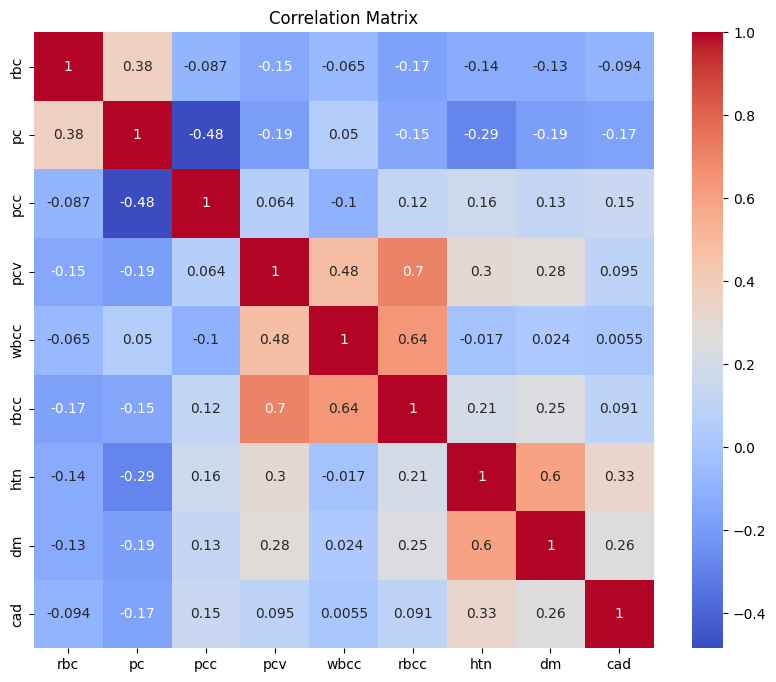

In [65]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [67]:
data.sample(20)

,bp,sg,al,su,rbc,pc,pcc,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,class
374,80,1.025,0,0,0,0,1,111,44,1.2,146,3.6,16.3,40,8000,6.4,1,1,1,notckd
52,90,1.015,0,0,0,0,1,?,38,2.2,?,?,10.9,34,4300,3.7,1,1,1,ckd
236,80,?,?,?,0,0,1,74,66,2,136,5.4,9.1,25,0,0.0,0,0,0,ckd
158,60,1.02,3,2,0,0,0,424,48,1.5,132,4,10.9,31,0,0.0,0,0,0,ckd
86,80,?,?,?,0,0,1,415,37,1.9,?,?,?,0,0,0.0,1,0,1,ckd
263,80,1.02,0,0,0,0,1,117,46,1.2,137,5,16.2,45,8600,5.2,1,1,1,notckd
63,70,1.015,1,0,1,0,1,150,111,6.1,131,3.7,7.5,27,0,0.0,1,1,1,ckd
0,80,1.02,1,0,0,0,1,121,36,1.2,?,?,15.4,44,7800,5.2,0,0,1,ckd
28,70,?,1,3,0,0,1,123,31,1.4,?,?,?,0,0,0.0,1,0,1,ckd
238,100,?,?,?,0,0,1,201,241,13.4,127,4.8,9.4,28,0,0.0,0,0,1,ckd


In [69]:
# now see the bottom 10
data_clean.tail(10)

,rbcc,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,class
390,5.3,80,1.025,0,0,99,25,0.8,135,3.7,15,notckd
391,6.3,80,1.025,0,0,85,16,1.1,142,4.1,15.6,notckd
392,5.5,80,1.02,0,0,133,48,1.2,147,4.3,14.8,notckd
393,5.4,60,1.025,0,0,117,45,0.7,141,4.4,13,notckd
394,4.6,80,1.02,0,0,137,46,0.8,139,5,14.1,notckd
395,4.9,80,1.02,0,0,140,49,0.5,150,4.9,15.7,notckd
396,6.2,70,1.025,0,0,75,31,1.2,141,3.5,16.5,notckd
397,5.4,80,1.02,0,0,100,26,0.6,137,4.4,15.8,notckd
398,5.9,60,1.025,0,0,114,50,1,135,4.9,14.2,notckd
399,6.1,80,1.025,0,0,131,18,1.1,141,3.5,15.8,notckd


In [70]:
HTML(data.to_html()) # just looking for something I may have missed in the pandas profiling

,bp,sg,al,su,rbc,pc,pcc,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,class
0,80,1.02,1,0,0,0,1,121,36,1.2,?,?,15.4,44,7800,5.2,0,0,1,ckd
1,50,1.02,4,0,0,0,1,?,18,0.8,?,?,11.3,38,6000,0.0,1,1,1,ckd
2,80,1.01,2,3,0,0,1,423,53,1.8,?,?,9.6,31,7500,0.0,1,0,1,ckd
3,70,1.005,4,0,0,1,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,ckd
4,80,1.01,2,0,0,0,1,106,26,1.4,?,?,11.6,35,7300,4.6,1,1,1,ckd
5,90,1.015,3,0,0,0,1,74,25,1.1,142,3.2,12.2,39,7800,4.4,0,0,1,ckd
6,70,1.01,0,0,0,0,1,100,54,24,104,4,12.4,36,0,0.0,1,1,1,ckd
7,?,1.015,2,4,0,1,1,410,31,1.1,?,?,12.4,44,6900,5.0,1,0,1,ckd
8,100,1.015,3,0,0,1,0,138,60,1.9,?,?,10.8,33,9600,4.0,0,0,1,ckd
9,90,1.02,2,0,1,1,0,70,107,7.2,114,3.7,9.5,29,12100,3.7,0,0,1,ckd


In [71]:
# Convert categorical data into numerical values using one-hot encoding
#data = pd.get_dummies(data)
#Convert categorical data into numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column].astype(str))

In [72]:
# Splitting into features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Labels

In [74]:
# Compute the correlation matrix
corr_matrix = data.corr()

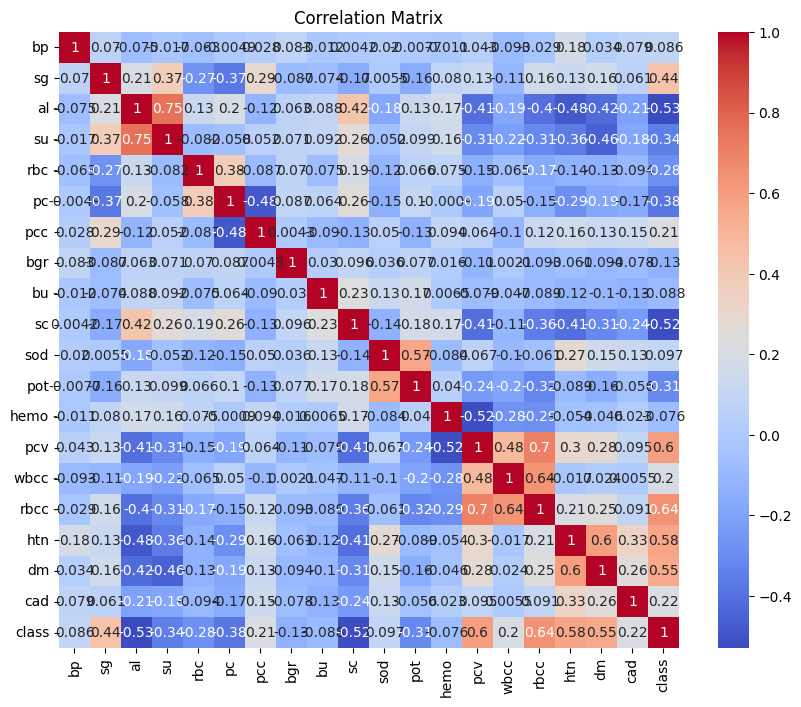

In [77]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [78]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
nb_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)  # Set probability=True


In [113]:
# Training the classifiers
nb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [114]:
# Obtain class probabilities for each classifier
nb_probs = nb_clf.predict_proba(X_test)[:, 1]
dt_probs = dt_clf.predict_proba(X_test)[:, 1]
svm_probs = svm_clf.predict_proba(X_test)[:, 1]

In [116]:
# Ensemble Predictions
nb_pred = nb_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)

In [117]:
# Ensemble Voting
ensemble_pred = np.array([np.argmax(np.bincount(pred)) for pred in zip(nb_pred, dt_pred, svm_pred)])


In [118]:
# Compute the probabilities for positive class (class 1)
nb_probs = nb_clf.predict_proba(X_test)[:, 1]
dt_probs = dt_clf.predict_proba(X_test)[:, 1]
svm_probs = svm_clf.predict_proba(X_test)[:, 1]


In [119]:
# Compute the ensemble probabilities
ensemble_probs = (nb_probs + dt_probs + svm_probs) / 3.0


In [123]:
from sklearn.metrics import roc_curve
# Compute ROC curve and AUC for each classifier and the ensemble
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)

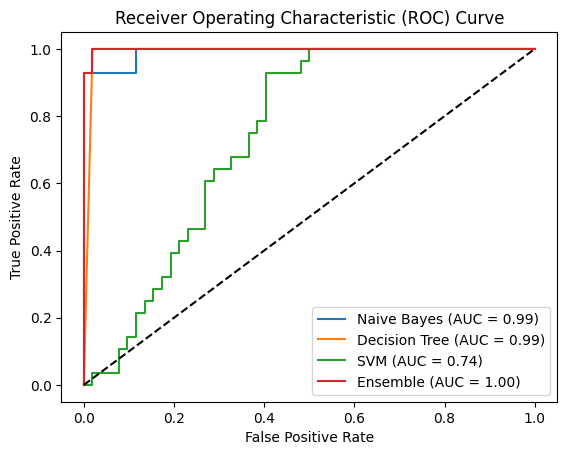

In [124]:
# Plot the ROC curves
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(ensemble_fpr, ensemble_tpr, label='Ensemble (AUC = {:.2f})'.format(ensemble_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [125]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred)
recall = recall_score(y_test, ensemble_pred)
f1 = f1_score(y_test, ensemble_pred)

print("Ensemble Accuracy: {:.2f}".format(accuracy))
print("Ensemble Precision: {:.2f}".format(precision))
print("Ensemble Recall: {:.2f}".format(recall))
print("Ensemble F1-score: {:.2f}".format(f1))


Ensemble Accuracy: 0.99
Ensemble Precision: 0.97
Ensemble Recall: 1.00
Ensemble F1-score: 0.98


In [126]:
# Cross-
k = 7
kf = KFold(n_splits=k, random_state=42, shuffle=True)
scores = cross_val_score(nb_clf, X, y, cv=kf)

print("Cross-validation Scores: {}".format(scores))
print("Average Cross-validation Score: {:.2f}".format(scores.mean()))

Cross-validation Scores: [0.98275862 0.94736842 0.98245614 0.92982456 0.98245614 0.9122807
 0.9122807 ]
Average Cross-validation Score: 0.95
